In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [134]:
CC_share = 0.0
cost_diff = 1.0
EmissionLimit = 20000

data_name = "capacity.csv"
#"demand.csv"
#"ex_export.csv"
#"ex_import.csv"
#"level.csv"
#"production.csv"
#"use.csv"
fossil_tech =  ['CoalPowerPlant', 'GasPowerPlant', 'CoalCHPPlant', 'GasCHPPlant']
fossil_techCC =  ['CoalPowerPlantCC', 'GasPowerPlantCC', 'CoalCHPPlantCC', 'GasCHPPlantCC']

colors = {
    "CoalPowerPlant" : "#754937",
    "GasPowerPlant" : "#e54213",
    "CoalCHPPlant" : "#472111",
    "GasCHPPlant" : "#880000",
    "CoalPowerPlantCC" : "#282828",
    "GasPowerPlantCC" : "#3C3C3C",
    "CoalCHPPlantCC" : "#9E9E9E",
    "GasCHPPlantCC" : "#686868",
}

In [165]:
CC_share_array = [0.1,0.5,1.0]
cost_diff_array = [1.1,1.3,1.5]
EmissionLimit_array = [20000,10000,0]

def find_other_tech(df):
    other_tech = df.Technology.unique().tolist()
    for t in fossil_tech:
        other_tech.remove(t)
    for t in fossil_techCC:
        other_tech.remove(t)
    return other_tech

def build_all_scenarios(CC_share_array,cost_diff_array,EmissionLimit_array):
    df_stack = pd.DataFrame()
    for CC_share in CC_share_array:
        for cost_diff in cost_diff_array:
            for EmissionLimit in EmissionLimit_array:
                try:
                    df = pd.read_csv(f"../results/CC{CC_share}-Cost{cost_diff}-ELimit{EmissionLimit}/{data_name}")
                    df = df.groupby("Technology").sum().drop(columns=["Region"],index=find_other_tech(df))
                    df = df.reindex(fossil_tech+fossil_techCC)
                    df_bar = pd.DataFrame(data=df).T.rename(index={"value": f"CC{CC_share}-_Cost{cost_diff}-_ELimit{EmissionLimit}"})
                except:
                    df_bar = pd.DataFrame(index=[f"Infeasable CC{CC_share}-_Cost{cost_diff}-_ELimit{EmissionLimit}"], columns=fossil_tech+fossil_techCC).fillna(0)
                
                df_stack = pd.concat([df_bar, df_stack])
                
    color = [colors[t] for t in df_stack.columns] 

    fig, ax = plt.subplots(figsize=(10, 6))
    df_stack.plot.bar(ax=ax, stacked=True, color=color)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


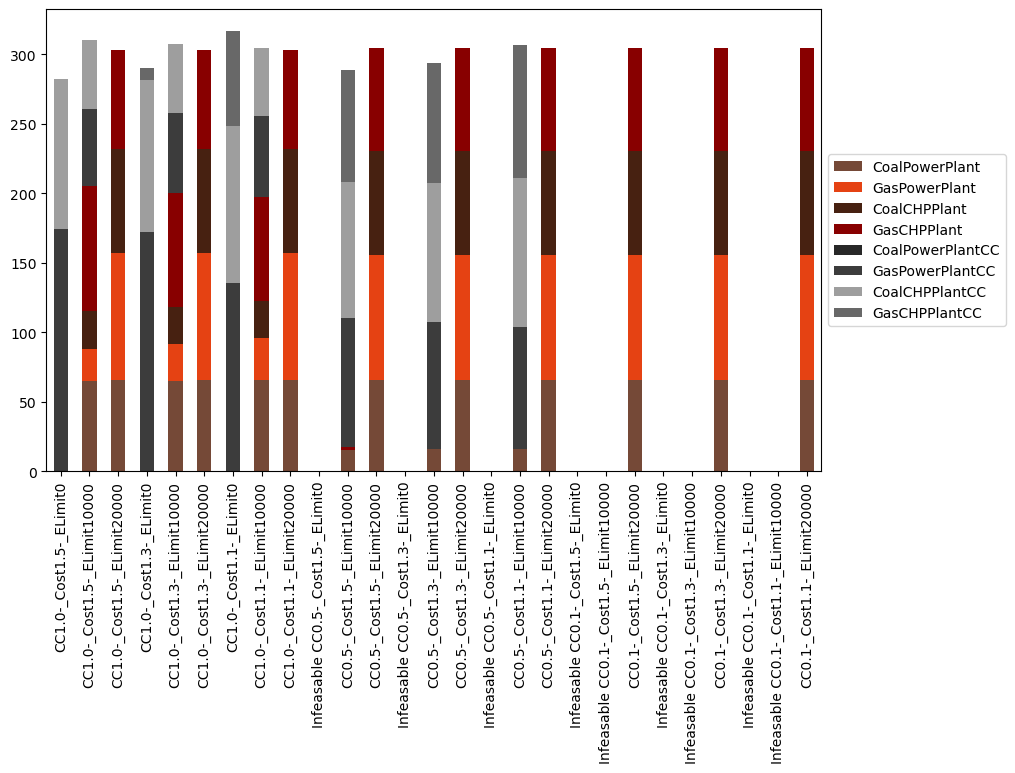

In [167]:
build_all_scenarios(CC_share_array,cost_diff_array,EmissionLimit_array)